# Practical Project 2 - Part I

#### Students:
   - Bonifácio de Oliveira (bldof.eng16@uea.edu.br)
   - Luiz Fábio (lfba.lic17@uea.edu.br)
   - Luiz Felipe (lfda.lic17@uea.edu.br)
   - Rafaela Melo (rmf.lic16@uea.edu.br)

In [2]:
import numpy as np
import pandas as pd
from random import  uniform
import matplotlib.pyplot as plt

# Rosenblatt neuron class

In [4]:
class Neuron:
    
    def __init__(self):
        self.data = np.array([])
        self.load_data()
        self.weights = np.array([
            uniform(-.5, .5),
            uniform(-.5, .5),
            uniform(-.5, .5)
        ])
        
        self.teta = 0
        self.ta   = 0.1
        self.vies = -1
        self.total_of_adjustments = []
        self.epoch = 0
        self.x1 = 0
        self.x2 = 0
        
    def load_data(self):
        dataset = np.fromfile('dataAll.txt')
        rows  = len(dataset)//3
        columns = 3
        self.data=dataset.reshape(rows, columns)
    
    def show_graphic(self):
        fig, ax = plt.subplots()
        for i in self.data:
            x = i[0]
            y = i[1]
            yd = int(i[2])
            if(yd >= 1):
                plt.scatter(x,y, color='r', s=8)
            else:
                plt.scatter(x,y, color='b', s=8)

        point1 = [0,self.x1]
        point2 = [self.x2,0]
        x_values = [point1[0], point2[0]]
        y_values = [point1[1], point2[1]]

        ax.plot(x_values, y_values)
        plt.show()
        
    def function_activation(self,num):
        if (num>=self.teta):
            return 1
        else:
            return 0
        
    def perceptron(self):
        adjustment_number = 0
        
        for i in self.data:
            
            input_value = np.concatenate((np.array([self.vies]), i[:2]))
            yd = int(i[2:])
            yr = round(input_value.dot(self.weights),4)
            yr = self.function_activation(yr)
            
            adjustment_number += 1
            
            self.weights = self.weight_adjustment(yd, yr, input_value)
            
            if(yr != yd):
                self.total_of_adjustments.append(adjustment_number)
                print("Number of adjustments: ",adjustment_number)
                return False
            
        self.total_of_adjustments.append(adjustment_number)
        print("Number of adjustments: ",adjustment_number)
        return True

    def weight_adjustment(self, yd, yr, input_value):
        delta = self.ta * np.array(yd - yr).dot(input_value)
        new_weights = self.weights + delta
        
        return new_weights
    
    def find_x1_x2(self):
        w = self.weights

        w0_w2 = w[0]/w[2]
        w1_w2 = w[1]/w[2]

        self.x2 = w0_w2 - w1_w2 * 0
        self.x1 = w0_w2/w1_w2
    
    def training(self):
        self.epoch = 1
        print("-----------------------------\nEpoch: ",self.epoch,"\n")
        while(self.perceptron() == False):
            self.epoch+=1
            print("-----------------------------\nEpoch: ",self.epoch,"\n")
        
        self.find_x1_x2()
        
        print("Total epoch: ",self.epoch)
        print("Total adjustments made: ",sum(self.total_of_adjustments))
            
n = Neuron()

# Dataset

In [6]:
n.data

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

# Starting weights

In [7]:
n.weights

array([0.10846791, 0.08661853, 0.42382727])

# Training

In [8]:
n.training()

-----------------------------
Epoch:  1 

Number of adjustments:  1
-----------------------------
Epoch:  2 

Number of adjustments:  4
-----------------------------
Epoch:  3 

Number of adjustments:  8
-----------------------------
Epoch:  4 

Number of adjustments:  19
-----------------------------
Epoch:  5 

Number of adjustments:  4
-----------------------------
Epoch:  6 

Number of adjustments:  5
-----------------------------
Epoch:  7 

Number of adjustments:  19
-----------------------------
Epoch:  8 

Number of adjustments:  4
-----------------------------
Epoch:  9 

Number of adjustments:  19
-----------------------------
Epoch:  10 

Number of adjustments:  4
-----------------------------
Epoch:  11 

Number of adjustments:  5
-----------------------------
Epoch:  12 

Number of adjustments:  19
-----------------------------
Epoch:  13 

Number of adjustments:  4
-----------------------------
Epoch:  14 

Number of adjustments:  19
-----------------------------
Epoch:  

Number of adjustments:  605
-----------------------------
Epoch:  139 

Number of adjustments:  19
-----------------------------
Epoch:  140 

Number of adjustments:  5
-----------------------------
Epoch:  141 

Number of adjustments:  605
-----------------------------
Epoch:  142 

Number of adjustments:  19
-----------------------------
Epoch:  143 

Number of adjustments:  5
-----------------------------
Epoch:  144 

Number of adjustments:  605
-----------------------------
Epoch:  145 

Number of adjustments:  19
-----------------------------
Epoch:  146 

Number of adjustments:  5
-----------------------------
Epoch:  147 

Number of adjustments:  605
-----------------------------
Epoch:  148 

Number of adjustments:  19
-----------------------------
Epoch:  149 

Number of adjustments:  5
-----------------------------
Epoch:  150 

Number of adjustments:  605
-----------------------------
Epoch:  151 

Number of adjustments:  19
-----------------------------
Epoch:  152 

Numbe

# Line points (x1 and x2)

Demonstration of the points found that will generate the point separation line.

In [9]:
print("X1: ", n.x1)
print("X2: ", n.x2)

X1:  -0.0023330337325410794
X2:  0.0023425681223345073


# Graph illustrating data distribution
Samples with label 1 are red and label 0 is blue

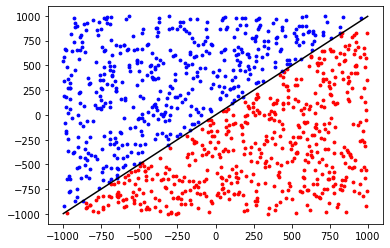

In [11]:
fig, ax = plt.subplots()

straight_size = np.arange(-1000, 1000)

for i in n.data:
    x = i[0]
    y = i[1]
    yd = int(i[2])
    if(yd >= 1):
        plt.scatter(x,y, color='r', s=8)
    else:
        plt.scatter(x,y, color='b', s=8)

m = -n.x1/n.x2
ax.plot(straight_size, straight_size*m, color="black")
plt.show()